<a href="https://colab.research.google.com/github/fathimashanavas/Projects/blob/main/Mushroom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrooms-Poisonous/Edible Prediction

# Introduction

This dataset includes the description of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota family.This dataset helps us to find correctly the mushrooms are poisonous or edible by it's specification like cap shape,cap,color,gill color, etc. using different classifiers.

# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DataSet/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Shape of the Dataset

In [ ]:
df.shape

(8124, 23)

# Check missing values

In [ ]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Check the datatypes

In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

# Classes in output

In [ ]:
df['class'].unique()

array(['p', 'e'], dtype=object)

# Check the value counts

In [ ]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# Visualization

[]

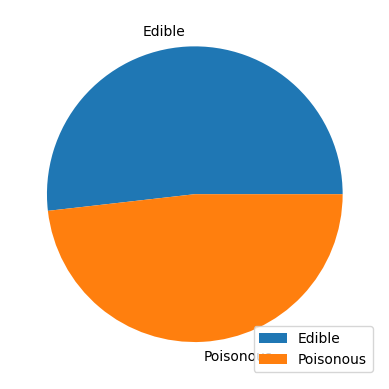

In [ ]:
counts=[4208,3916]
classes=['Edible','Poisonous']
plt.pie(counts,labels=classes)
plt.legend()
plt.plot()

Using matplotlib we can visualize  how much poisonous and edible mushrooms are there in the class.And we can see from pie diagram we can easily understand that edible mushrooms are more than poisonous mushroom and it is a balanced dataset,there is only slight change in the propotion.This dataset is a balanced dataset(A balanced dataset where each output classes is represented by the same number of input samples.Slight variation is not concern).


In this dataset all the columns are object.So here we use label encoder(it gives numerical values for each element on the columns based on the alphabetic order)


In [ ]:
le1=LabelEncoder()
df['class']=le1.fit_transform(df['class'])
le2=LabelEncoder()
df['cap-shape']=le2.fit_transform(df['cap-shape'])
le3=LabelEncoder()
df['cap-surface']=le3.fit_transform(df['cap-surface'])
le4=LabelEncoder()
df['cap-color']=le4.fit_transform(df['cap-color'])
le5=LabelEncoder()
df['bruises']=le5.fit_transform(df['bruises'])
le6=LabelEncoder()
df['odor']=le6.fit_transform(df['odor'])
le7=LabelEncoder()
df['gill-attachment']=le7.fit_transform(df['gill-attachment'])
le8=LabelEncoder()
df['gill-size']=le8.fit_transform(df['gill-size'])
le9=LabelEncoder()
df['gill-color']=le9.fit_transform(df['gill-color'])
le10=LabelEncoder()
df['stalk-shape']=le10.fit_transform(df['stalk-shape'])
le11=LabelEncoder()
df['stalk-root']=le11.fit_transform(df['stalk-root'])
le12=LabelEncoder()
df['stalk-surface-above-ring']=le12.fit_transform(df['stalk-surface-above-ring'])
le13=LabelEncoder()
df['stalk-surface-below-ring']=le13.fit_transform(df['stalk-surface-below-ring'])
le14=LabelEncoder()
df['stalk-color-above-ring']=le14.fit_transform(df['stalk-color-above-ring'])
le15=LabelEncoder()
df['stalk-color-below-ring']=le15.fit_transform(df['stalk-color-below-ring'])
le16=LabelEncoder()
df['veil-type']=le16.fit_transform(df['veil-type'])
le17=LabelEncoder()
df['veil-color']=le17.fit_transform(df['veil-color'])
le18=LabelEncoder()
df['ring-number']=le18.fit_transform(df['ring-number'])
le19=LabelEncoder()
df['ring-type']=le19.fit_transform(df['ring-type'])
le20=LabelEncoder()
df['spore-print-color']=le20.fit_transform(df['spore-print-color'])
le21=LabelEncoder()
df['population']=le21.fit_transform(df['population'])
le22=LabelEncoder()
df['habitat']=le22.fit_transform(df['habitat'])
le23=LabelEncoder()
df['gill-spacing']=le23.fit_transform(df['gill-spacing'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
df.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-type                   int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

All the elements in each column changed to numerical values and it's datatype is also changed.

In [ ]:
df['class'].value_counts()   #0--->edible,1--->poisonous

0    4208
1    3916
Name: class, dtype: int64

# Separate X and y

In [ ]:
X=df.iloc[:,1:]
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [ ]:
y=df.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

# Scaling the dataset

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[1.        , 0.66666667, 0.44444444, ..., 0.25      , 0.6       ,
        0.83333333],
       [1.        , 0.66666667, 1.        , ..., 0.375     , 0.4       ,
        0.16666667],
       [0.        , 0.66666667, 0.88888889, ..., 0.375     , 0.4       ,
        0.5       ],
       ...,
       [0.4       , 0.66666667, 0.44444444, ..., 0.        , 0.2       ,
        0.33333333],
       [0.6       , 1.        , 0.44444444, ..., 0.875     , 0.8       ,
        0.33333333],
       [1.        , 0.66666667, 0.44444444, ..., 0.5       , 0.2       ,
        0.33333333]])

# Split data into train and test data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)

In [ ]:
X_train.shape

(5686, 22)

In [ ]:
y_train.shape

(5686,)

# Models using Algorithms

Knn,SVC,naive_bayes,DecitionTreeClassifiers,RandomForestClassifiers and AaBoostClassifiers algorithms are used here.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



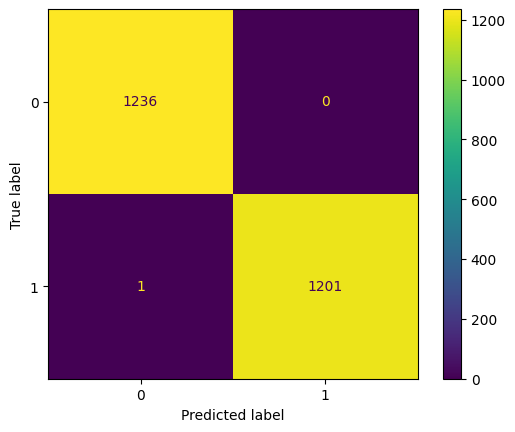

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1236
           1       0.96      0.92      0.94      1202

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



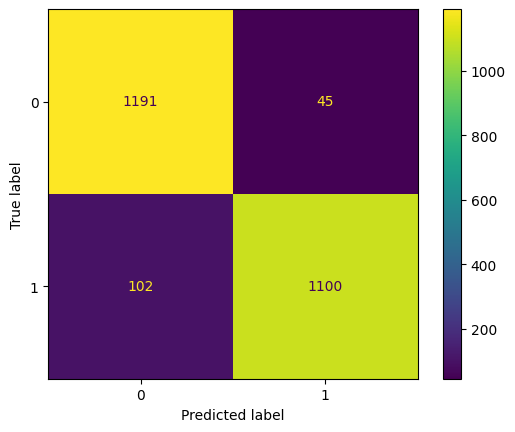

In [ ]:
sv=SVC(kernel='linear')
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



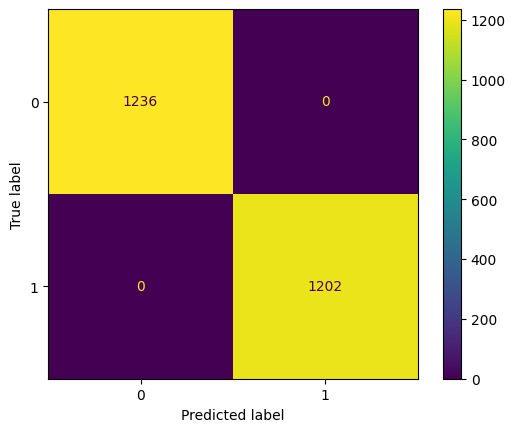

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
sv1=SVC(kernel='poly')
sv1.fit(X_train,y_train)
y_pred1=sv1.predict(X_test)
print(classification_report(y_test,y_pred1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1236
           1       0.92      0.92      0.92      1202

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



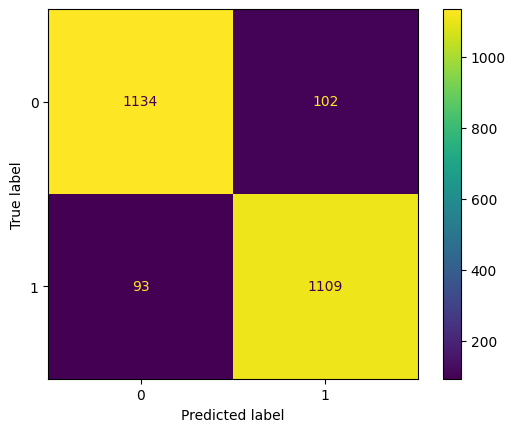

In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



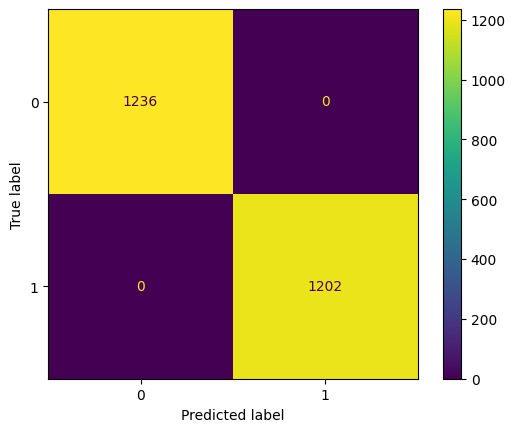

In [ ]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



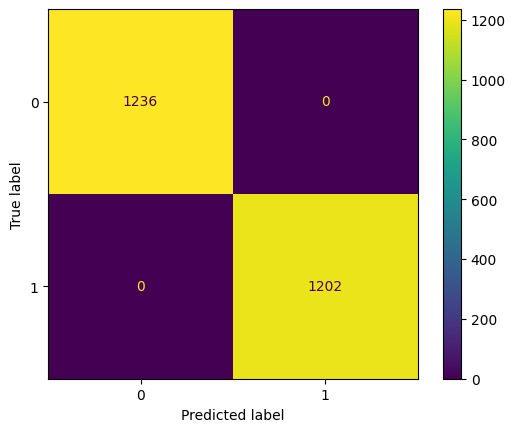

In [ ]:
rf=RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



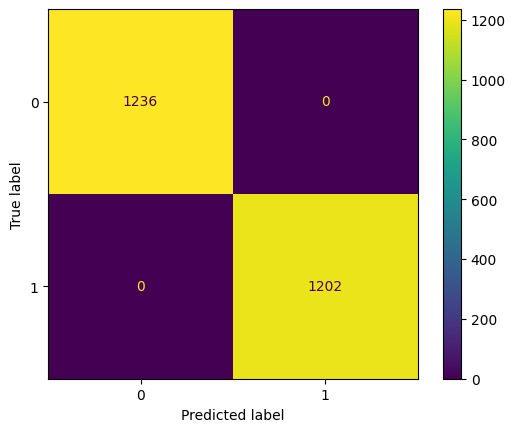

In [ ]:
ad=AdaBoostClassifier(random_state=1)
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Here all the models other than gaussianNB gives 100% accuracy and the model SVC with kernel with linear has less accuracy.But in the ConfusionMatrixDisplay of knn model we can see that there one element which gives FN(false negative)

We changed each and every column to numeric values using labelencoder.So after creating model,to predict a new model we want change each columns from numeric value to original form.

# Conclusion

After all of the models calculations, we can now compare them,from above observation it is noted that SVC(with kernel-poly),DecisionTreeClassifier,RandomForestClassifiers and AdaBoostClassifier are best models for our mushroom dataset.And we get 100%accuracy,recall,precision,and f1_score from each model and we can see that how well they performed compared to one another.Here 4 models gives best classification_report so I randomly select the DecisionTreeClassifier as best model for this Dataset(on my study from kaggle and google about mushroom dataset I found out that DecisionTreeClassifier is best model for mushroom dataset).

# Predicting a New value

In [ ]:
y_new_dt=dt.predict(scaler.transform([[5,2,4,1,6,1,0,1,4,0,2,7,7,0,2,1,4,2,3,5,0,1]]))
if y_new_dt==0:
  print('it is edible')
else:
  print('it is poisonous')

it is poisonous


# Saving the model

In [ ]:
import pickle

In [ ]:
filename='mushroom_model.sav'
pickle.dump(dt,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('mushroom_model.sav','rb'))